# Analyze the correlation between features and response
Since the trained statistical models did not meet our expectatoins regarding establishing a meaningful association between the TF affinity scores as features and gene expression as response, we decided to take a deeper look at the link(s) between these two quantities.

## Load the feature data

In [1]:
# x <- read.csv("scMTL_StemNet_imputed_TPM_feature_reduced_var.txt")
# rownames(x) <- x$X
# x <- x[, -1]
# dim(x)
# [1] 13906   452
# x <- log2(1 + x)


# full.x <- read.table("/MMCI/MS/EpiregDeep2/work/Tools/TEPIC_GS/hg38_Static/2kb/Static_hg38_PromFeatures_2kb_Gene_View.txt", header= T)
# dim(full.x)
# [1] 58082   727
# rownames(full.x) <- full.x$gene_id
# full.x <- full.x[, -1]
# full.x <- log2(1 + full.x)

# bulk.rna <- read.table("/MMCI/MS/ExpRegulation/work/data/singleCell/iPCs_Kathrin/bulkRNAseq_TPM.txt")
# hits.fullx <- which(rownames(full.x) %in% rownames(bulk.rna))
## full.x <- full.x[hits.fullx]
# save(full.x, x, file= "TF_promoter2.RData")

In [2]:
load("../TF_promoter.RData")

In [3]:
rm(list= ls())
load("../TF_promoter2.RData")

In [4]:
print(ls())

[1] "full.x" "x"     


The **full.x** variable contains the unfiltered samples (genes), wherease the **x** has only those that survived the gene expression variance filtering explained in [iPCs data and tree-guided MTL results notebook](https://github.com/fba67/scMTL/blob/master/sc_iPCs.ipynb). I decided to include the full gene set as well to assure that this lack of association we've observed between the features and responses wasn't due to any other preprocessing steps.

In [5]:
print(dim(full.x))
print(dim(x))

[1] 58082   726
[1] 13906   452


## Print the range of data
The features data are log-transformed before-hand when dumped into the RData file.

In [6]:
print(range(x))
print(range(full.x))

[1] 0.0000000 0.7455161
[1] 0.000000 1.143897


## Types of gene expression measurements (response)
We had initiated the problem by approaching the single cell gene expression as the responses. However, we decided to look into the bulk RNA-seq available for the same cell types provided by Kathrin. Here, we're goining to investigate their correlation with features for both single cell and bulk measurements of gene expression.

* [Single cell gene expression](#sc)
* [Bulk gene expression](#bulk)

# Single cell gene expression <a class= "anchor" id= "SC"></a>

## Read the response (imputed sc gene expression)

In [7]:
#full.y <- read.csv("/MMCI/MS/ExpRegulation/work/data/singleCell/iPCs_Kathrin/scImpute/StemNet_readCounts_Kclust2scimpute_count.csv")
full.y <- read.csv("/MMCI/MS/ExpRegulation/work/data/singleCell/HepG2/G_MTL/monocle/StemNet_imputed_TPM_converted.csv")
y <- read.csv("../scMTL_StemNet_imputed_TPM_response_reduced_var.txt")

rownames(full.y) <- full.y$X
full.y <- full.y[, -1]

rownames(y) <- y$X
y <- y[, -1]

In [8]:
print(dim(full.y))
print(dim(y))

[1] 56757   657
[1] 13906   640


## Find the overlapping genes (full)

In [9]:
full.data <- merge(full.x, full.y, by= "row.names")
data <- merge(x, y, by= "row.names")

In [10]:
rownames(full.data) <- full.data$Row.names
full.data <- full.data[, -1]

rownames(data) <- data$Row.names
data <- data[, -1]

In [11]:
dim(full.data)
dim(data)

[1] 56666  1383

[1] 13906  1092

## Adjust the data variables based on the overlapping genes found above
split the merged dataset into the x and y variables

In [12]:
full.x <- full.data[, seq(ncol(full.x))]
full.y <- full.data[, seq(1 + ncol(full.x), ncol(full.data))]

In [13]:
all.equal(rownames(full.x), rownames(full.y))

[1] TRUE

In [14]:
x <- data[, seq(ncol(x))]
y <- data[, seq(1 + ncol(x), ncol(data))]

In [15]:
all.equal(rownames(x), rownames(y))

[1] TRUE

In [16]:
dim(full.x)
dim(full.y)
dim(x)
dim(y)

[1] 56666   726

[1] 56666   657

[1] 13906   452

[1] 13906   640

In [17]:
full.x[1:5, 1:5]
x[1:5, 1:5]

full.y[1:5, 1:5]
y[1:5, 1:5]

,AHR..ARNT,DDIT3..CEBPA,MAX..MYC,PPARG..RXRA,RXRA..VDR
ENSG00000000003,0.0006853000,0.0025808288,2.020445e-05,6.041068e-05,8.409835e-05
ENSG00000000005,0.0006148164,0.0002469801,3.310350e-06,1.020107e-05,2.971438e-06
ENSG00000000419,0.0394694687,0.0013199393,9.261950e-04,9.143963e-04,3.916165e-05
ENSG00000000457,0.0038627042,0.0001221161,6.589233e-05,3.095366e-03,3.311621e-05
ENSG00000000460,0.0000000000,0.0000000000,0.000000e+00,0.000000e+00,0.000000e+00


,RXRA..VDR,TAL1..TCF3,HAND1..TCF3,NFIC..TLX1,GATA1..TAL1
ENSG00000000003,8.409835e-05,6.809267e-05,0.0011714082,4.292226e-04,9.570524e-04
ENSG00000000005,2.971438e-06,4.630280e-05,0.0024374150,1.844279e-05,2.873608e-05
ENSG00000000419,3.916165e-05,5.353939e-04,0.0089839512,9.651023e-06,4.147972e-06
ENSG00000000457,3.311621e-05,7.126695e-06,0.0006619569,2.130502e-04,8.772645e-07
ENSG00000000460,0.000000e+00,0.000000e+00,0.0000000000,0.000000e+00,0.000000e+00


,HLC_CEL_c1_R1,HLC_CEL_c10_R1,HLC_CEL_c11_R1,HLC_CEL_c13_R1,HLC_CEL_c14_R1
ENSG00000000003,77.76976598,149.795705,187.0059603,55.6367184,61.54605477
ENSG00000000005,0.03028473,0.000000,0.1775571,0.0000000,0.01333547
ENSG00000000419,113.10983416,214.795969,222.6304539,125.6892242,88.01497682
ENSG00000000457,0.65171792,12.396580,0.2768822,4.8721790,0.43982053
ENSG00000000460,0.27237818,2.749921,0.8304052,0.9607715,0.50373967


,HLC_CEL_c1_R1,HLC_CEL_c10_R1,HLC_CEL_c11_R1,HLC_CEL_c13_R1,HLC_CEL_c14_R1
ENSG00000000003,8.172956e-02,0.077963216,0.1676020832,0.059508155,4.896241e-02
ENSG00000000005,3.182673e-05,0.000000000,0.0001591337,0.000000000,1.060891e-05
ENSG00000000419,1.188690e-01,0.111793490,0.1995301528,0.134435209,7.001952e-02
ENSG00000000457,6.849013e-04,0.006451969,0.0002481527,0.005211206,3.498952e-04
ENSG00000000460,2.862468e-04,0.001431234,0.0007442417,0.001027626,4.007455e-04


## Log-transform the response data

In [18]:
full.y <- log2(1 + full.y)
y <- log2(1 + y)

In [19]:
print(range(full.y))
print(range(y))

[1]  0.00000 18.60009
[1]  0.00000 10.33516


## Compute the correlation between each feature and each response vector (gene expression profile per cell)

* [Correlations on full datasets](#full)
* [Correlations on filtered datasets](#filtered)

## Correlations on full datasets <a class= "anchor" id= "full"></a>

In [20]:
full.cors <- list()
for(i in seq(ncol(full.y)))
    full.cors[[i]] <- sapply(seq(ncol(full.x)), function(j)cor(as.numeric(full.x[, j]), as.numeric(full.y[, i])))

## Print the range of the resulting correlation values for each cell

In [21]:
df.full <- data.frame(min= as.numeric(lapply(full.cors, FUN= min)), max= as.numeric(lapply(full.cors, FUN= max)))
rownames(df.full) <- colnames(full.y)
df.full[seq(50), ]

,min,max
HLC_CEL_c1_R1,-0.1322317,0.2872518
HLC_CEL_c10_R1,-0.1260645,0.2891240
HLC_CEL_c11_R1,-0.1264427,0.2836147
HLC_CEL_c13_R1,-0.1284518,0.2880049
HLC_CEL_c14_R1,-0.1322657,0.2973263
HLC_CEL_c15_R1,-0.1295899,0.2944388
HLC_CEL_c16_R1,-0.1296403,0.2913589
HLC_CEL_c17_R1,-0.1334745,0.2965058
HLC_CEL_c18_R1,-0.1334334,0.2963942
HLC_CEL_c19_R1,-0.1281319,0.2882075


## Plot histogram to have a more concise view of the correlation distributions

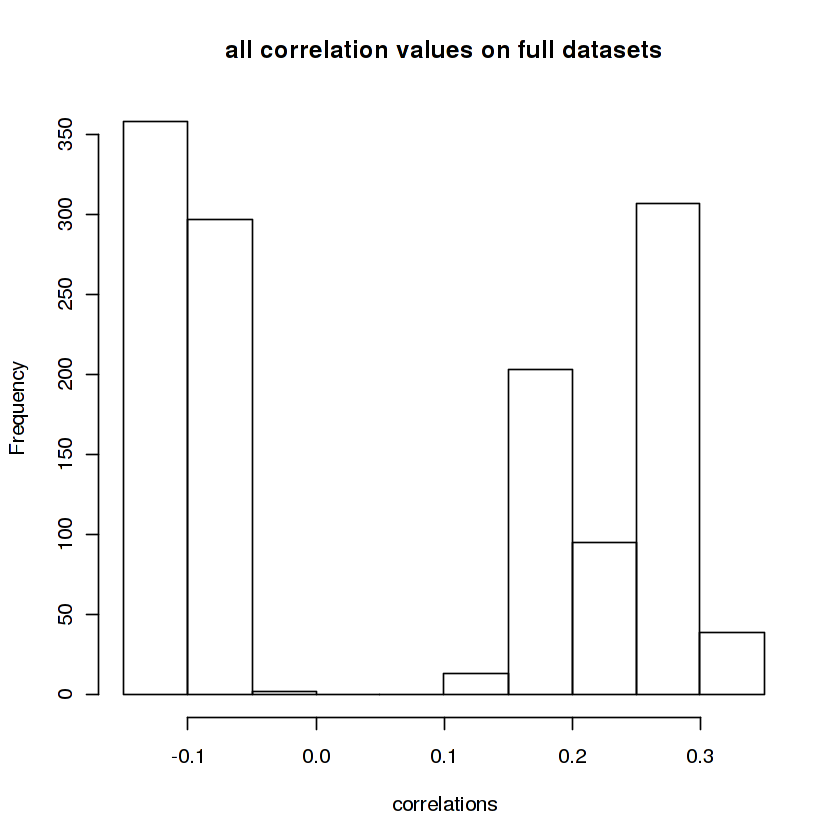

In [22]:
hist(as.matrix(df.full), main= "all correlation values on full datasets", xlab= "correlations")

## Correlations on filtered datasets <a class= "anchor" id= "filtered"></a>

In [23]:
cors <- list()
for(i in seq(ncol(y)))
    cors[[i]] <- sapply(seq(ncol(x)), function(j)cor(x[, j], y[, i]))

## Print the range of the resulting correlation values for each cell

In [24]:
df <- data.frame(min= as.numeric(lapply(cors, FUN= min)), max= as.numeric(lapply(cors, FUN= max)))
rownames(df) <- colnames(y)
df[seq(50), ]

,min,max
HLC_CEL_c1_R1,-0.04778397,0.04942259
HLC_CEL_c10_R1,-0.04498635,0.05020681
HLC_CEL_c11_R1,-0.04839170,0.05024366
HLC_CEL_c13_R1,-0.04801421,0.06011916
HLC_CEL_c14_R1,-0.03158886,0.04699246
HLC_CEL_c15_R1,-0.05363181,0.05975630
HLC_CEL_c16_R1,-0.05734945,0.05220080
HLC_CEL_c17_R1,-0.06041690,0.06436837
HLC_CEL_c18_R1,-0.06165649,0.06048806
HLC_CEL_c19_R1,-0.05450735,0.05493791


## Plot histogram to have a more concise view of the correlation distributions

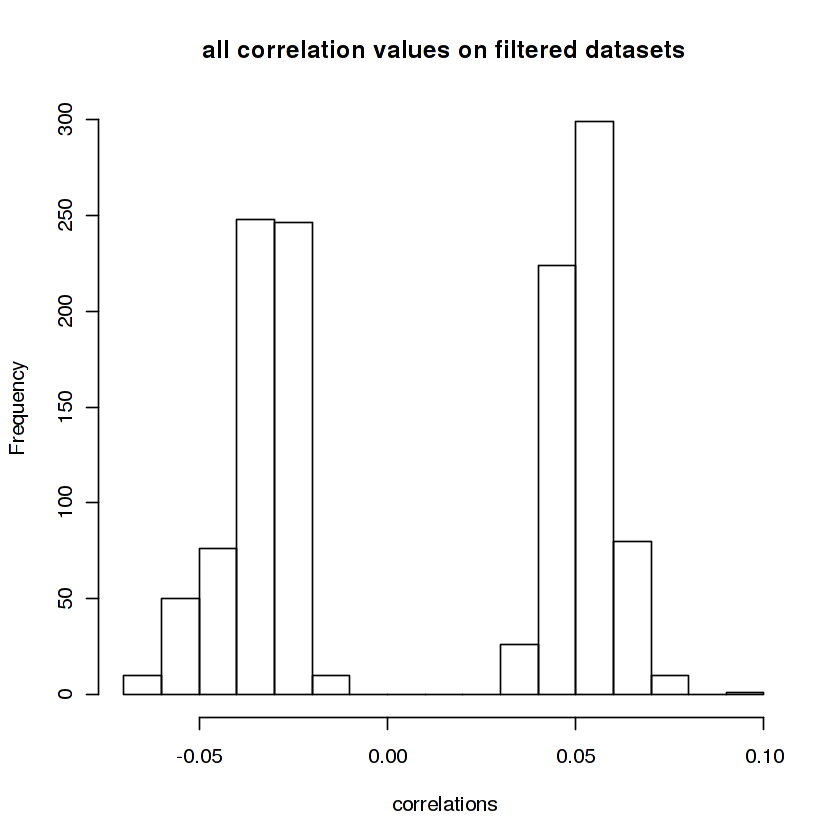

In [25]:
hist(as.matrix(df), main= "all correlation values on filtered datasets", xlab= "correlations")

# Bulk gene expression <a class= "anchor" id= "bulk"></a>

## Read the bulk expression data
I decided to work with the TPM data I generated myself by converting the read counts to TPM values, as the original TPM values sent by Kathrin wasn't showing a good correlation.

In [26]:
# bulk.rna <- read.table("/MMCI/MS/ExpRegulation/work/data/singleCell/iPCs_Kathrin/bulkRNAseq_TPM.txt")

bulk.rna <- read.csv("/MMCI/MS/ExpRegulation/work/data/singleCell/iPCs_Kathrin/bulkRNAseq_TPM_converted.csv")
rownames(bulk.rna) <- bulk.rna$X
bulk.rna <- bulk.rna[, -1]

In [27]:
head(bulk.rna)

,CEL_R1_HLC,CEL_R2_HLC,CEL_R3_HLC,CEL_R4_HLC,HAY_R1_HLC,X41_Hm09_LiHe_Ct_mRNA_K_1,X41_Hm16_LiHe_Ct_mRNA_K_1,X41_Hm25_LiHe_Ct_mRNA_K_1,X41_Hf02_LiHe_Ct_mRNA_K_1,X41_Hf03_LiHe_Ct_mRNA_K_1,X41_Hf11_LiHe_St_mRNA_K_1
ENSG00000000003,141.77763905,125.99175739,152.35437006,124.835864,114.9411404,51.3968045,33.9430242,43.807648162,23.59289823,33.392843,49.15157974
ENSG00000000005,2.25748308,1.93448369,3.11671185,1.606904,0.3171036,0.0000000,0.0000000,0.008498938,0.04050946,0.000000,0.02103444
ENSG00000000419,68.25441786,92.95232739,64.79050234,58.325938,140.8523232,53.2049794,43.1705366,37.966311098,27.84152895,47.931342,69.41435928
ENSG00000000457,4.23904426,3.09547284,4.39660520,3.006963,5.2663247,8.2313089,5.2852810,5.755211962,4.02474129,6.788159,7.29413550
ENSG00000000460,1.32819395,2.90635271,1.60426024,1.200657,4.7913626,1.5418638,2.0743050,1.942307097,4.95955774,1.147432,1.69979944
ENSG00000000938,0.07265376,0.04075102,0.08888723,0.000000,1.1021952,0.9738455,0.9922475,0.244203790,5.07362354,1.054751,0.40455277


## Load the feature data again

In [28]:
load("../TF_promoter2.RData")

## Match the gene names between features and the bulk expression data

In [29]:
full.data <- merge(bulk.rna, full.x, by= "row.names")
data <- merge(bulk.rna, x, by= "row.names")

rownames(full.data) <- full.data$Row.names
full.data <- full.data[, -1]

rownames(data) <- data$Row.names
data <- data[, -1]

In [30]:
head(rownames(full.x))

[1] "ENSG00000282222" "ENSG00000282221" "ENSG00000110514" "ENSG00000086015"
[5] "ENSG00000211769" "ENSG00000211768"

## Log-transform the bulk expressio data

In [31]:
full.bulk <- log2(1 + full.data[, seq(ncol(bulk.rna))])
full.x <- full.data[, -seq(ncol(full.bulk))]

bulk <- log2(1 + data[, seq(ncol(bulk.rna))])
x <- data[, -seq(ncol(bulk.rna))]

In [32]:
all.equal(rownames(full.x), rownames(full.bulk))

[1] TRUE

In [33]:
head(rownames(x))
head(rownames(bulk))
all.equal(rownames(x), rownames(bulk))

[1] "ENSG00000000003" "ENSG00000000005" "ENSG00000000419" "ENSG00000000457"
[5] "ENSG00000000460" "ENSG00000000971"

[1] "ENSG00000000003" "ENSG00000000005" "ENSG00000000419" "ENSG00000000457"
[5] "ENSG00000000460" "ENSG00000000971"

[1] TRUE

In [34]:
print(dim(x))
print(dim(bulk))

[1] 13906   452
[1] 13906    11


## Correlations on full datasets

In [35]:
full.cors <- list()
for(i in seq(ncol(full.bulk)))
    full.cors[[i]] <- sapply(seq(ncol(full.x)), function(j)cor(full.x[, j], full.bulk[, i]))

In [36]:
df.full <- data.frame(min_cor= as.numeric(lapply(full.cors, FUN= min)), max_cor= as.numeric(lapply(full.cors, FUN= max)))
rownames(df.full) <- colnames(bulk.rna)
df.full

,min_cor,max_cor
CEL_R1_HLC,-0.1873557,0.3279683
CEL_R2_HLC,-0.1908662,0.3351633
CEL_R3_HLC,-0.1845152,0.3218288
CEL_R4_HLC,-0.1864353,0.3252894
HAY_R1_HLC,-0.2101426,0.3563037
X41_Hm09_LiHe_Ct_mRNA_K_1,-0.1535480,0.3361905
X41_Hm16_LiHe_Ct_mRNA_K_1,-0.1538151,0.3302623
X41_Hm25_LiHe_Ct_mRNA_K_1,-0.1638683,0.3430856
X41_Hf02_LiHe_Ct_mRNA_K_1,-0.1800834,0.3436168
X41_Hf03_LiHe_Ct_mRNA_K_1,-0.1611542,0.3518796


## Correlations on filtered datasets

In [37]:
cors <- list()
for(i in seq(ncol(bulk)))
    cors[[i]] <- sapply(seq(ncol(x)), function(j)cor(x[, j], bulk[, i]))

In [38]:
df <- data.frame(min= as.numeric(lapply(cors, FUN= min)), max= as.numeric(lapply(cors, FUN= max)))
rownames(df) <- colnames(bulk.rna)
df

,min,max
CEL_R1_HLC,-0.2031512,0.2370884
CEL_R2_HLC,-0.2069644,0.2492576
CEL_R3_HLC,-0.1978892,0.2328433
CEL_R4_HLC,-0.2035162,0.2378997
HAY_R1_HLC,-0.2137296,0.2703384
X41_Hm09_LiHe_Ct_mRNA_K_1,-0.1325808,0.2193187
X41_Hm16_LiHe_Ct_mRNA_K_1,-0.1338424,0.2113603
X41_Hm25_LiHe_Ct_mRNA_K_1,-0.1475083,0.2271533
X41_Hf02_LiHe_Ct_mRNA_K_1,-0.1758160,0.2531224
X41_Hf03_LiHe_Ct_mRNA_K_1,-0.1473936,0.2410930


# Conclusion
* The aim was to look for linear relationship between the TF binding affinity scores as features and single cell/bulk measurements of gene expression as response by computing the correlation between the two.
* The unfiltered (full) and filtered datasets were consideted to examine such associasions. However, none showed any descent correlation.
* The correlations values computed on the full datasets showed a descent range between -0.1 and 0.3, however on the filtered data the values drop drastically; a range between -0.1 and 0.1
* It's worth noting that these static features are not perfect representitves of the transcription dynamics, therefore one should not expect good correlations, and thus training a statistical model would have a better saying on the contributions of TFs in gene expression. The tree-guided MTL and neural networks trained on the single cells did not show any satisfactory results. However, I'll be testing neural networks on the bulk gene expression data to rule out any doubt with this regard.
* For the bulk experiments, I switched from the TPM data sent by Kathrin to the one converted by myself (from read counts to TPM) and that made the correlations much better. With the original TPM values that was sent by Kathrin (data not shown) the correlations were at max 0.09 (mostly around 0.02) but with the converted TPM data made by me, the correlation values are much better (above 0.3 for the unfiltered data)